In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pizza_Sale.csv')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
def date_taime(text):
    try:
        return pd.to_datetime(text, format="%d-%m-%Y")
    except ValueError:
        try:
            return pd.to_datetime(text, format="%d/%m/%Y")
        except ValueError:
            return pd.NaT
df['order_date'] = df['order_date'].apply(date_taime)

df.dropna(inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48554 non-null  int64         
 1   order_id           48554 non-null  int64         
 2   pizza_name_id      48554 non-null  object        
 3   quantity           48554 non-null  int64         
 4   order_date         48554 non-null  datetime64[ns]
 5   order_time         48554 non-null  object        
 6   unit_price         48554 non-null  float64       
 7   total_price        48554 non-null  float64       
 8   pizza_size         48554 non-null  object        
 9   pizza_category     48554 non-null  object        
 10  pizza_ingredients  48554 non-null  object        
 11  pizza_name         48554 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


In [11]:
df.shape

(48554, 12)

In [10]:
# Group by 'pizza_name_id' and 'order_date' and sum the 'quantity'
daily_sales = df.groupby(['pizza_name_id', 'order_date'])['quantity'].sum().reset_index()

# Rename columns for clarity
daily_sales.rename(columns={'quantity': 'daily_sales'}, inplace=True)

# Display the aggregated data
print(daily_sales.head())

# Optionally, save the aggregated data to a new CSV file
daily_sales.to_csv('daily_sales.csv', index=False)


  pizza_name_id order_date  daily_sales
0     bbq_ckn_l 2015-01-01            6
1     bbq_ckn_l 2015-01-02            2
2     bbq_ckn_l 2015-01-03            3
3     bbq_ckn_l 2015-01-04            5
4     bbq_ckn_l 2015-01-05            1


In [12]:
daily_sales.shape

(22945, 3)

In [13]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22945 entries, 0 to 22944
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pizza_name_id  22945 non-null  object        
 1   order_date     22945 non-null  datetime64[ns]
 2   daily_sales    22945 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 537.9+ KB


In [15]:
from prophet import Prophet
data = daily_sales
forecast_results = pd.DataFrame()

# Get unique pizza_name_ids
pizza_ids = data['pizza_name_id'].unique()

# Loop through each pizza_name_id
for pizza_id in pizza_ids:
    print(f"Training model for pizza: {pizza_id}")
    
    # Filter data for the specific pizza
    pizza_data = data[data['pizza_name_id'] == pizza_id]
    
    # Prepare the data for Prophet
    pizza_data = pizza_data.rename(columns={'order_date': 'ds', 'daily_sales': 'y'})
    
    # Initialize the Prophet model
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(pizza_data)
    
    # Create a DataFrame for future dates (e.g., next 7 days)
    future_dates = model.make_future_dataframe(periods=7)
    
    # Forecast sales
    forecast = model.predict(future_dates)
    
    # Add the pizza_name_id to the forecast
    forecast['pizza_name_id'] = pizza_id
    
    # Append the results to the forecast_results DataFrame
    forecast_results = pd.concat([forecast_results, forecast[['ds', 'yhat', 'pizza_name_id']]])
    
    # Optional: Save individual pizza forecast as CSV
    forecast[['ds', 'yhat']].to_csv(f'forecast_{pizza_id}.csv', index=False)

# Save all forecasts to a CSV
forecast_results.to_csv('all_pizza_forecasts.csv', index=False)

print("Forecasting completed. Results saved to 'all_pizza_forecasts.csv'.")

Training model for pizza: bbq_ckn_l


13:15:40 - cmdstanpy - INFO - Chain [1] start processing
13:15:40 - cmdstanpy - INFO - Chain [1] done processing
13:15:41 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: bbq_ckn_m


13:15:41 - cmdstanpy - INFO - Chain [1] done processing
13:15:41 - cmdstanpy - INFO - Chain [1] start processing
13:15:41 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: bbq_ckn_s


13:15:41 - cmdstanpy - INFO - Chain [1] start processing
13:15:41 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: big_meat_s


13:15:41 - cmdstanpy - INFO - Chain [1] start processing
13:15:41 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: brie_carre_s


13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: calabrese_l


13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: calabrese_m


13:15:42 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: calabrese_s


13:15:42 - cmdstanpy - INFO - Chain [1] done processing
13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: cali_ckn_l


13:15:43 - cmdstanpy - INFO - Chain [1] start processing
13:15:43 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: cali_ckn_m


13:15:43 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: cali_ckn_s


13:15:43 - cmdstanpy - INFO - Chain [1] done processing
13:15:43 - cmdstanpy - INFO - Chain [1] start processing
13:15:43 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ckn_alfredo_l


13:15:43 - cmdstanpy - INFO - Chain [1] start processing
13:15:44 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ckn_alfredo_m


13:15:44 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: ckn_alfredo_s


13:15:45 - cmdstanpy - INFO - Chain [1] done processing
13:15:45 - cmdstanpy - INFO - Chain [1] start processing
13:15:45 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ckn_pesto_l


13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ckn_pesto_m


13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ckn_pesto_s


13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: classic_dlx_l


13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: classic_dlx_m


13:15:47 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: classic_dlx_s


13:15:47 - cmdstanpy - INFO - Chain [1] done processing
13:15:47 - cmdstanpy - INFO - Chain [1] start processing
13:15:47 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: five_cheese_l


13:15:47 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: four_cheese_l


13:15:47 - cmdstanpy - INFO - Chain [1] done processing
13:15:47 - cmdstanpy - INFO - Chain [1] start processing
13:15:48 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: four_cheese_m


13:15:48 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: green_garden_l


13:15:48 - cmdstanpy - INFO - Chain [1] done processing
13:15:48 - cmdstanpy - INFO - Chain [1] start processing
13:15:48 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: green_garden_m


13:15:48 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: green_garden_s


13:15:48 - cmdstanpy - INFO - Chain [1] done processing
13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: hawaiian_l


13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: hawaiian_m


13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: hawaiian_s


13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ital_cpcllo_l


13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:50 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ital_cpcllo_m


13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:50 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ital_cpcllo_s


13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:50 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ital_supr_l


13:15:50 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: ital_supr_m


13:15:51 - cmdstanpy - INFO - Chain [1] done processing
13:15:51 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ital_supr_s
Training model for pizza: ital_veggie_l


13:15:51 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ital_veggie_m


13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing
13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: ital_veggie_s


13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: mediterraneo_l


13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: mediterraneo_m


13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: mediterraneo_s


13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: mexicana_l


13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: mexicana_m


13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: mexicana_s


13:15:54 - cmdstanpy - INFO - Chain [1] start processing
13:15:54 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: napolitana_l


13:15:54 - cmdstanpy - INFO - Chain [1] start processing
13:15:54 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: napolitana_m


13:15:54 - cmdstanpy - INFO - Chain [1] start processing
13:15:54 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: napolitana_s


13:15:54 - cmdstanpy - INFO - Chain [1] start processing
13:15:54 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: pep_msh_pep_l


13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: pep_msh_pep_m


13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: pep_msh_pep_s


13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: pepperoni_l


13:15:55 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: pepperoni_m


13:15:55 - cmdstanpy - INFO - Chain [1] done processing
13:15:56 - cmdstanpy - INFO - Chain [1] start processing
13:15:56 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: pepperoni_s


13:15:56 - cmdstanpy - INFO - Chain [1] start processing
13:15:56 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: peppr_salami_l


13:15:56 - cmdstanpy - INFO - Chain [1] start processing
13:15:56 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: peppr_salami_m


13:15:56 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: peppr_salami_s


13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: prsc_argla_l


13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: prsc_argla_m


13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: prsc_argla_s


13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: sicilian_l


13:15:58 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: sicilian_m


13:15:58 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: sicilian_s


13:15:58 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: soppressata_l


13:15:58 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: soppressata_m


13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: soppressata_s


13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: southw_ckn_l


13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: southw_ckn_m


13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: southw_ckn_s


13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spicy_ital_l


13:16:00 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: spicy_ital_m


13:16:00 - cmdstanpy - INFO - Chain [1] done processing
13:16:00 - cmdstanpy - INFO - Chain [1] start processing


Training model for pizza: spicy_ital_s


13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spin_pesto_l


13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spin_pesto_m
Training model for pizza: spin_pesto_s


13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spinach_fet_l


13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spinach_fet_m


13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spinach_fet_s


13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spinach_supr_l


13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: spinach_supr_m
Training model for pizza: spinach_supr_s


13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:03 - cmdstanpy - INFO - Chain [1] done processing
13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:03 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: thai_ckn_l


13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:03 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: thai_ckn_m


13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: thai_ckn_s


13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: the_greek_l


13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: the_greek_m


13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: the_greek_s


13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: the_greek_xl
Training model for pizza: the_greek_xxl
Training model for pizza: veggie_veg_l


13:16:05 - cmdstanpy - INFO - Chain [1] start processing
13:16:05 - cmdstanpy - INFO - Chain [1] done processing
13:16:05 - cmdstanpy - INFO - Chain [1] start processing
13:16:05 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: veggie_veg_m


13:16:05 - cmdstanpy - INFO - Chain [1] start processing
13:16:05 - cmdstanpy - INFO - Chain [1] done processing


Training model for pizza: veggie_veg_s
Forecasting completed. Results saved to 'all_pizza_forecasts.csv'.


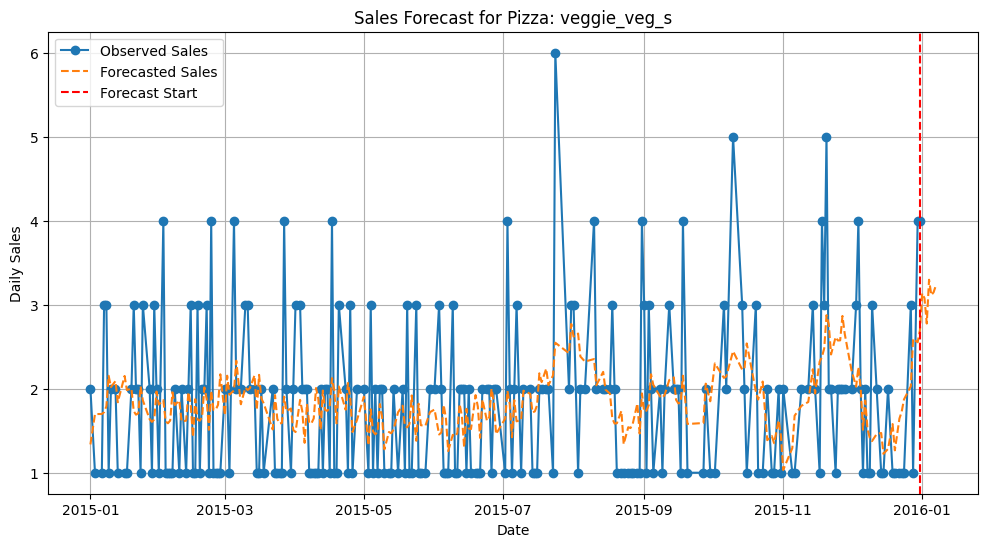

In [18]:
import matplotlib.pyplot as plt

def plot_forecast(pizza_data, forecast, pizza_id):
    """
    Plots observed and forecasted sales for a specific pizza type.
    
    Args:
    - pizza_data (DataFrame): Original sales data with columns 'ds' (date) and 'y' (observed sales).
    - forecast (DataFrame): Forecasted data with columns 'ds' (date) and 'yhat' (forecasted sales).
    - pizza_id (str): Identifier for the pizza type.
    """
    plt.figure(figsize=(12, 6))
    # Plot observed sales
    plt.plot(pizza_data['ds'], pizza_data['y'], label='Observed Sales', marker='o')
    # Plot forecasted sales
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', linestyle='--')
    # Add a vertical line to indicate the forecast start
    plt.axvline(x=pizza_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    # Titles and labels
    plt.title(f'Sales Forecast for Pizza: {pizza_id}')
    plt.xlabel('Date')
    plt.ylabel('Daily Sales')
    plt.legend()
    plt.grid()
    plt.show()
plot_forecast(pizza_data=pizza_data, forecast=forecast, pizza_id=pizza_id)